In [1]:
import json
import datetime
import pandas as pd
import seaborn as sns

sns.set()

answers = []
tweets = []
eads_research = []
data = []

with open('/albert/data/answered-sample-2018-11-27-19-34.json') as f:
    answers = json.load(f)
    
with open('/albert/data/sentiment-pilot-2018-11-27-20-08.json') as f:
    tweets = json.load(f)
    
with open('/albert/data/eads-research.csv') as f:
    eads_research = [txt.split(',') for txt in f.read().split('\n')]
    
def map_tweet(tweet):
    return {
        'user': tweet['user'],
        'created_at': tweet['created_at'],
    }

users_on_research = [x[0] for x in eads_research]
tweets = { tweet['id']: map_tweet(tweet) for tweet in tweets if tweet['user'] in users_on_research }
answers = [ answer for answer in answers if answer['id'] in tweets.keys() ]
data = {id: [] for id in users_on_research}

for answer in answers:
    for q in answer['questions'][0]:
        tweet = tweets[answer['id']]
        data[tweet['user']].append({
            'created_at': datetime.datetime.strptime(tweet['created_at'].split('Z')[0], "%Y-%m-%dT%H:%M:%S"),
            **q
        })
        
data = {k: v for k, v in data.items() if len(v) > 23}

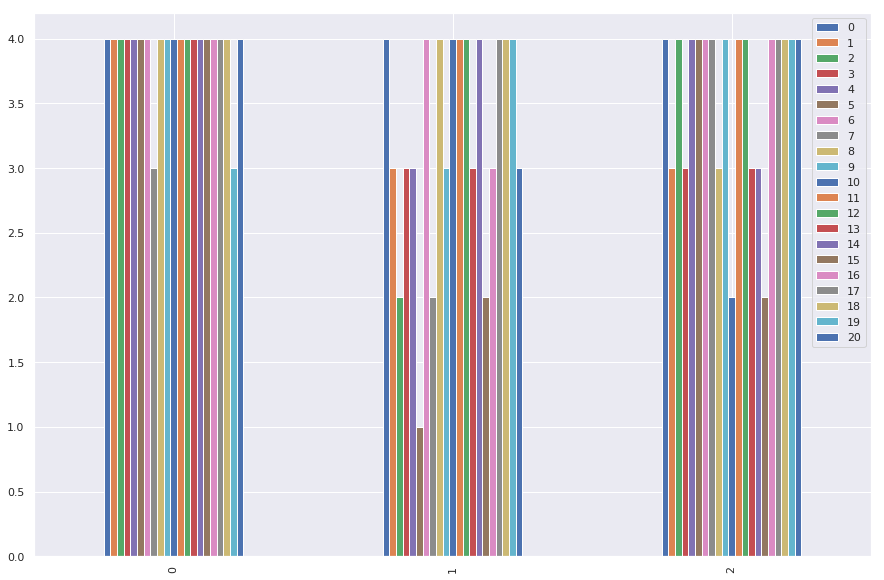

In [12]:
k = list(data.keys())

WEEK_YEAR = 2018
WEEK_MONTH = 11
START_DAY = 11

def filter_by_week(answers):
    start_date = datetime.datetime(WEEK_YEAR, WEEK_MONTH, START_DAY, 0, 0)
    end_date = datetime.datetime(WEEK_YEAR, WEEK_MONTH, START_DAY + 6, 23, 59)
    
    return list(filter(lambda i: start_date <= i['created_at'] <= end_date, answers))

def create_week_k(d):
    return '{}-{}-{}'.format(WEEK_YEAR, WEEK_MONTH, d)

def week_bucket(answers):
    values = filter_by_week(answers)
    week = { create_week_k(d): [0 for _ in range(0, 21)] for d in range(START_DAY, START_DAY + 7) }

    for v in values:
        week[create_week_k(v['created_at'].day)][v['question_index']] += 1
    
    return week

def create_chart(data):
    week = week_bucket(data)
    df = pd.DataFrame(list(week.values()), index=list(week.keys()))
    df.plot(kind='bar', figsize=(13,9))
    
def get_eads():
    p0 = map(int, [eads for eads in eads_research if eads[0] == k[0]][0][1:])
    p1 = map(int, [eads for eads in eads_research if eads[0] == k[1]][0][1:])
    p2 = map(int, [eads for eads in eads_research if eads[0] == k[2]][0][1:])
    p3 = map(int, [eads for eads in eads_research if eads[0] == k[3]][0][1:])
    return pd.DataFrame([p0, p2, p3])
    
get_eads().plot(kind='bar', figsize=(15,10))

45

In [4]:
def quantity_appearence(answers):
    answers = filter_by_week(answers)
    df = pd.DataFrame(answers).groupby(by=['question_index']).count()
    df['quantity'] = df['impact']
    return df.drop(columns=['impact', 'created_at']).sort_values(['quantity'], ascending=False)

quantity_appearence(data[k[3]])

,quantity
question_index,
15,7
0,6
2,5
12,5
17,4
8,3
10,3
16,3
4,2


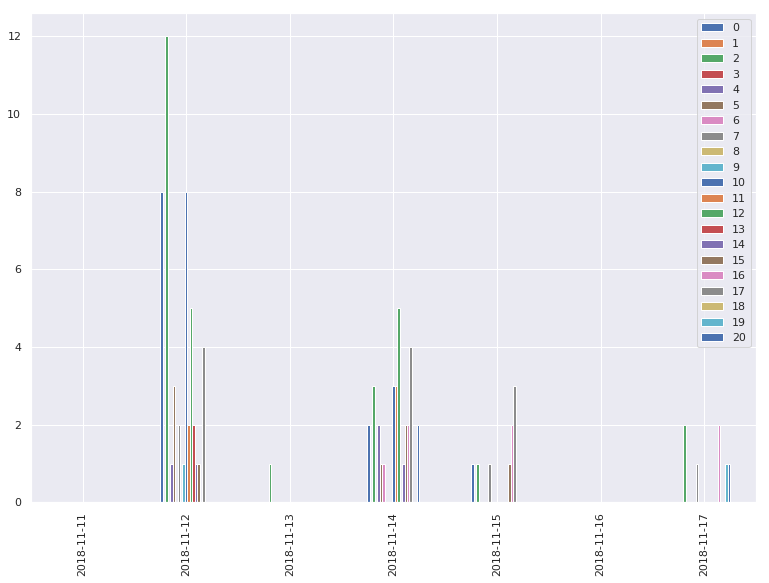

In [5]:
create_chart(data[k[0]])

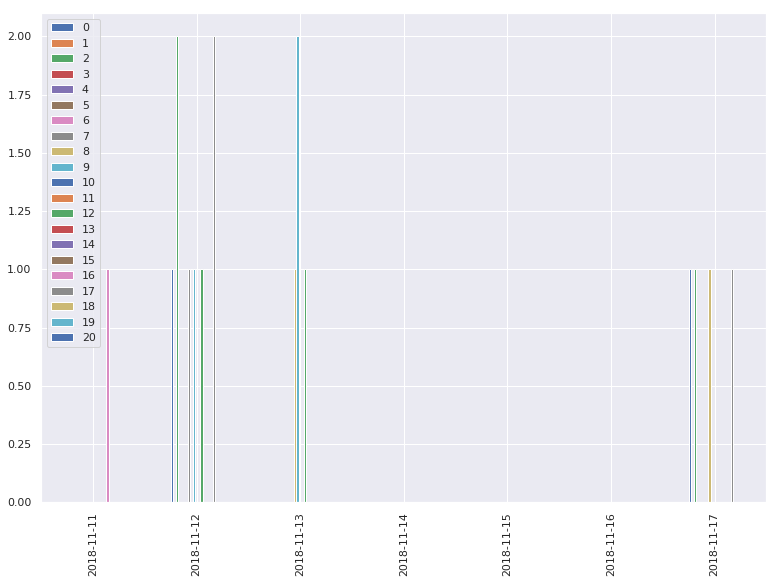

In [6]:
create_chart(data[k[1]])

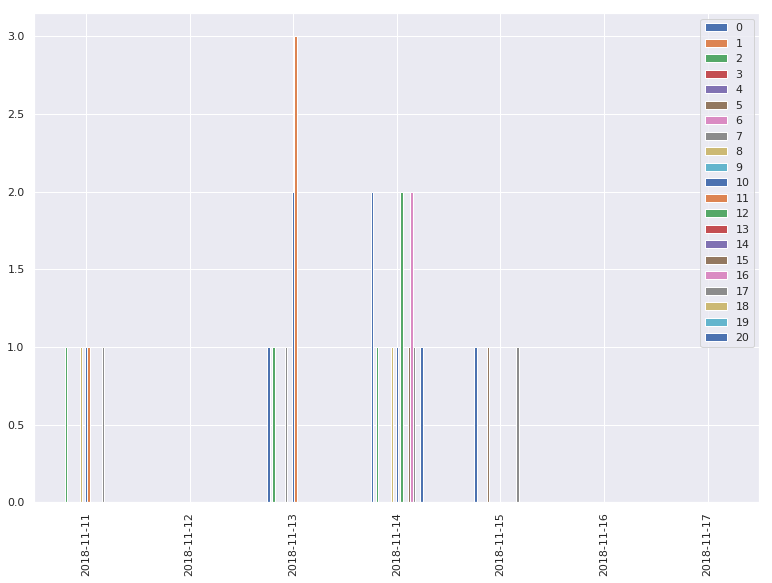

In [7]:
create_chart(data[k[2]])

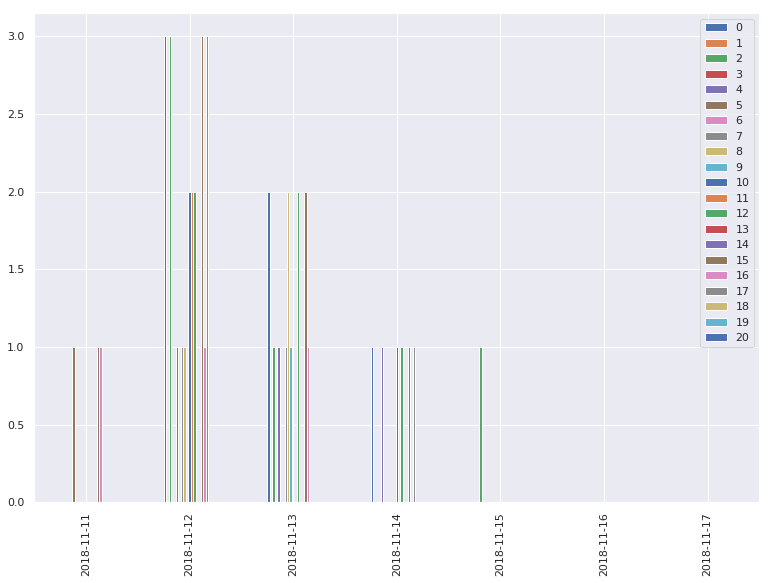

In [8]:
create_chart(data[k[3]])